In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('./'))))

from payoff import *

# KOSPI

In [2]:
put1 = (285,   0.97,  1, 250000)       # 풋매수
put2 = (292.5, 2.30, 1, 250000)       # 풋매도
call2 = (307.5, 0.75, 1, 250000)       # 콜매도
call1 = (315,    0.11, 1, 250000)       # 콜매수

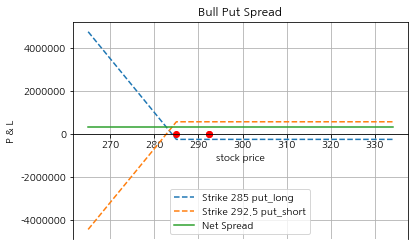

In [3]:
# bull put spread
st = np.arange(265, 335, 1)
total_payoff = np.zeros(st.shape)
fig, ax = plt.subplots()

# Long put : 낮은 행사가의 풋옵션 매수
strike1, premium, contracts, multiplier = put1

payoff = long_put_payoff(st, strike1, premium, contracts, multiplier)
plot_spread(st, payoff, strike1, fig, ax, 
            'Strike {} put_long'.format(strike1),'dashed')
total_payoff += payoff

# Short put : 더 높은 행사가의 풋옵션 매도
strike2, premium, contracts, multiplier = put2

payoff = short_put_payoff(st, strike1, premium, contracts, multiplier)
plot_spread(st, payoff, strike2, fig, ax, 
            'Strike {} put_short'.format(strike2),'dashed')
total_payoff += payoff

plot_spread(st, total_payoff, strike2, fig, ax, 'Net Spread','-')

plt.title('Bull Put Spread')
plt.show()

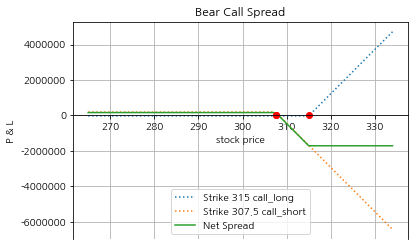

In [4]:
# bear call spread

st = np.arange(265, 335, 1)
total_payoff = np.zeros(st.shape)
fig, ax = plt.subplots()

# Long call : ,높은 행사가의 콜옵션 매수
strike1, premium, contracts, multiplier= call1

payoff = long_call_payoff(st, strike1, premium, contracts, multiplier)
plot_spread(st, payoff, strike1, fig, ax, 
            'Strike {} call_long'.format(strike1),'dotted')
total_payoff += payoff

# Short call : 더 낮은 행사가의 콜옵션 매도
strike2, premium, contracts, multiplier = call2

payoff = short_call_payoff(st, strike2, premium, contracts, multiplier)
plot_spread(st, payoff, strike2, fig, ax, 
            'Strike {} call_short'.format(strike2),'dotted')
total_payoff += payoff

plot_spread(st, total_payoff, strike2, fig, ax, 'Net Spread','-')

plt.title('Bear Call Spread')
plt.show()

Max Profit = 492,500.00
Max Loss = -1,382,500.00
Net Premium = 492,500.00
    Premium sold = 762,500.00
    Premium bought = 270,000.00


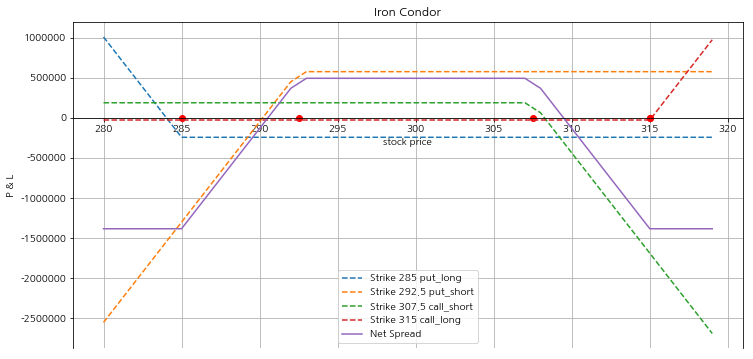

In [5]:
ironCondor(put1, put2, call2, call1,  (280, 320, 1))